<a href="https://colab.research.google.com/github/zahraziran/Smart-Home/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!ls "/content/drive/My Drive/Energy_Consumption"

df_holiday_encode.pickle.gz  df_merged.pickle.gz   Floors	    Smart_Environments.pptx
df_holiday.pickle.gz	     df_weather.pickle.gz  Note_Links.gdoc


In [ ]:
import os
import pandas as pd


root_path = "/content/drive/My Drive/Energy_Consumption"


In [ ]:
feature_selected = "z1_Plug(kW)"


In [ ]:
import os
for dirname, _, filenames in os.walk("/content/drive/My Drive/Energy_Consumption" + "/Floors"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Energy_Consumption/Floors/2018Floor1.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor2.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor3.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor4.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor5.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor6.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor7.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor1.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor2.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor3.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor4.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor5.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor6.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor7.csv
/content/drive/My Drive/Energy_Consumption/Floors/df_holiday.pickle.gz
/content/drive/My D

In [ ]:
path_file = "/content/drive/My Drive/Energy_Consumption" + "/Floors"

In [ ]:
df_data = pd.read_pickle(os.path.join(path_file, 'df_merged.pickle.gz'))
df_data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.00,65.16,29.40,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.00,65.17,29.30,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.00,65.18,29.30,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.00,65.18,29.30,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.00,65.18,29.40,0.0,0.0,0.0,0.13,66.70,28.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,1.25,...,0.07,55.96,28.50,0.0,0.0,0.0,0.03,52.86,29.43,0.0
2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,1.25,...,0.07,55.96,28.49,0.0,0.0,0.0,0.03,52.87,29.43,0.0
2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,1.24,...,0.07,56.00,28.50,0.0,0.0,0.0,0.03,52.84,29.42,0.0


In [ ]:
# Leave columns with keyword of 'kW'
df_powerMeter = df_data.loc[:, df_data.columns.str.contains('kW')].copy()
df_powerMeter = df_powerMeter.sum(axis=1).rename('total_demand')
df_powerMeter = df_powerMeter.resample('H').mean()
df_powerMeter

Date
2018-07-01 00:00:00    176.261667
2018-07-01 01:00:00    177.300000
2018-07-01 02:00:00    177.048833
2018-07-01 03:00:00    175.129167
2018-07-01 04:00:00    183.175000
                          ...    
2019-12-31 19:00:00    120.144500
2019-12-31 20:00:00    124.547667
2019-12-31 21:00:00    104.895333
2019-12-31 22:00:00     95.204167
2019-12-31 23:00:00     91.057667
Freq: H, Name: total_demand, Length: 13176, dtype: float64

<Axes: xlabel='Date'>

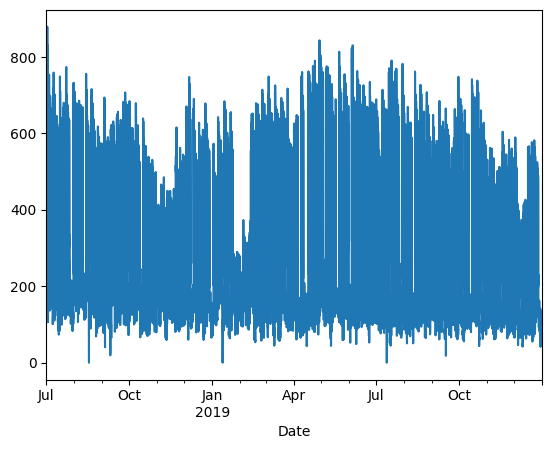

In [ ]:
df_powerMeter.plot()

In [ ]:
# Prepare data for modeling
df_temp = df_powerMeter.reset_index().copy()
df_temp = df_temp.dropna()

# Add timestamp features
df_temp['weekday'] = df_temp['Date'].dt.weekday
df_temp['hour'] = df_temp['Date'].dt.hour
df_temp['date'] =pd.to_datetime(df_temp['Date'].dt.date)

df_temp = df_temp.set_index('Date').drop(['date'],axis=1)

df_temp = df_temp.rename(columns={'total_demand':'total_demand_meas'})

df_temp

,total_demand_meas,weekday,hour
Date,,,
2018-07-01 00:00:00,176.261667,6,0
2018-07-01 01:00:00,177.300000,6,1
2018-07-01 02:00:00,177.048833,6,2
2018-07-01 03:00:00,175.129167,6,3
2018-07-01 04:00:00,183.175000,6,4
...,...,...,...
2019-12-31 19:00:00,120.144500,1,19
2019-12-31 20:00:00,124.547667,1,20
2019-12-31 21:00:00,104.895333,1,21


<Axes: xlabel='weekday,hour'>

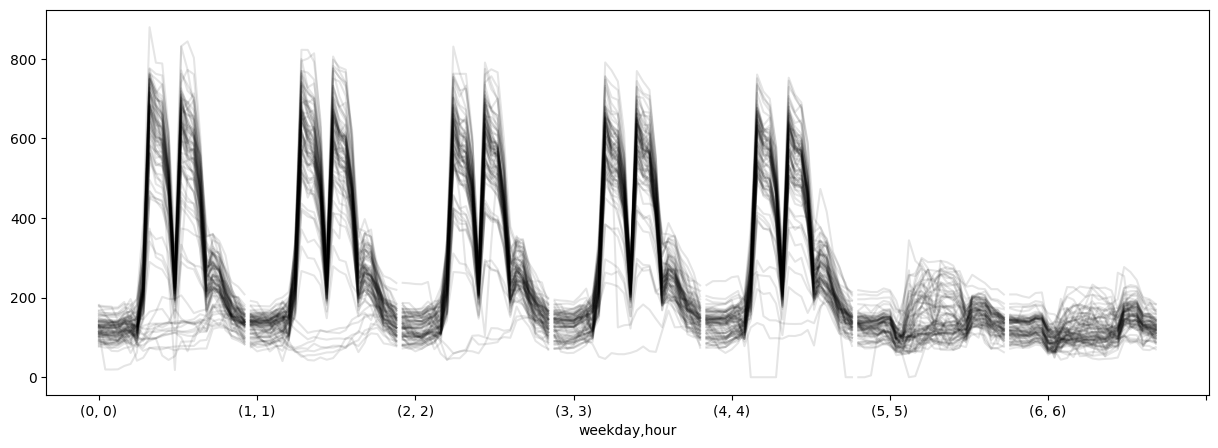

In [ ]:
# Weekly profiles of building energy
df_plot = df_temp.copy()
df_plot['date'] = pd.to_datetime(df_plot.index.date)
df_plot.pivot_table(columns=['weekday','hour'], index='date', values='total_demand_meas').T.plot(figsize=(15,5),color='black',alpha=0.1,legend=False)

In [ ]:
df_data = df_data[:10000]

In [ ]:
display(df_data)

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.0,65.16,29.40,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.0,65.17,29.30,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.0,65.18,29.30,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.0,65.18,29.30,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.0,65.18,29.40,0.0,0.0,0.0,0.13,66.70,28.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 22:35:00,13.07,18.50,45.69,0.03,0.01,0.00,16.29,16.68,27.19,0.82,...,0.0,61.78,28.86,0.0,0.0,0.0,0.03,63.72,28.71,0.0
2018-07-07 22:36:00,13.05,18.47,45.62,0.03,0.01,0.00,16.27,16.64,26.07,0.82,...,0.0,61.80,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0
2018-07-07 22:37:00,13.04,18.47,45.70,0.03,0.01,0.00,16.26,16.28,18.81,0.82,...,0.0,61.81,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0


In [ ]:
feature_selected = "Floor1_z3_Plug(kW)"

In [ ]:
df_data = df_data[(df_data[feature_selected] > 0)]

In [ ]:
df_data.describe()

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9977.000000,10000.000000,10000.000000,...,10000.000000,9697.000000,9697.000000,9697.000000,10000.000000,10000.000000,10000.00000,9749.000000,9749.000000,9749.000000
mean,6.479193,10.783698,32.823078,6.830561,0.009231,0.008377,16.353633,15.813369,26.134615,0.969652,...,0.009041,61.777583,26.847821,18.148293,3.040930,1.863905,0.08949,61.651761,27.554322,28.011488
std,8.715369,8.230486,20.803556,14.303472,0.004116,0.008984,2.157108,1.989511,13.132250,0.314769,...,0.022006,4.517677,3.178012,21.218314,5.332134,2.044002,0.14587,5.190259,2.210255,31.338304
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,7.290000,4.740000,5.640000,0.200000,...,0.000000,50.760000,19.860000,0.000000,0.000000,0.000000,0.02000,47.470000,23.240000,0.000000
25%,0.010000,1.160000,2.120000,0.020000,0.010000,0.000000,14.437500,15.110000,18.600000,0.730000,...,0.000000,58.350000,24.730000,0.000000,0.000000,0.000000,0.03000,57.260000,24.960000,0.000000
50%,0.020000,11.360000,45.660000,0.020000,0.010000,0.010000,16.160000,15.800000,26.440000,0.840000,...,0.000000,62.340000,27.890000,2.000000,0.000000,0.000000,0.03000,63.210000,28.350000,0.000000
75%,12.940000,19.090000,46.680000,0.040000,0.010000,0.010000,18.600000,16.960000,29.490000,1.250000,...,0.000000,65.400000,28.800000,38.000000,8.997500,4.170000,0.11000,65.900000,28.960000,64.000000
max,45.720000,37.440000,55.900000,50.500000,0.020000,0.030000,29.730000,52.210000,120.630000,3.100000,...,0.090000,71.620000,32.900000,76.000000,20.400000,5.170000,2.01000,69.900000,31.900000,73.000000


In [ ]:
# df_data = df_data[:1000]

In [ ]:
# df_data['Date'] = pd.to_datetime(df_data['Date'])

In [ ]:
# df_data=df_data.dropna()
# df_data.sort_index(inplace=True)

In [ ]:
# # we are choosing one of the consumptions
# # creating time series df



# series = pd.Series(df_data[feature_selected].tolist(), index=df_data['Date'])
# # df_time_series = df_data.set_index('Date')[feature_selected]
# series


In [ ]:
df_data.isnull().any()

Floor1_z1_Light(kW)    False
Floor1_z1_Plug(kW)     False
Floor1_z2_AC1(kW)      False
Floor1_z2_AC2(kW)      False
Floor1_z2_AC3(kW)      False
                       ...  
Floor7_z5_Light(kW)    False
Floor7_z5_Plug(kW)     False
Floor7_z5_S1(RH%)       True
Floor7_z5_S1(degC)      True
Floor7_z5_S1(lux)       True
Length: 192, dtype: bool

In [ ]:
df_data.head()

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.0,65.16,29.4,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.0,65.17,29.3,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.0,65.18,29.3,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.0,65.18,29.3,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.0,65.18,29.4,0.0,0.0,0.0,0.13,66.70,28.92,0.0


In [ ]:
# df_data = df_data[feature_selected]

<Axes: xlabel='Date'>

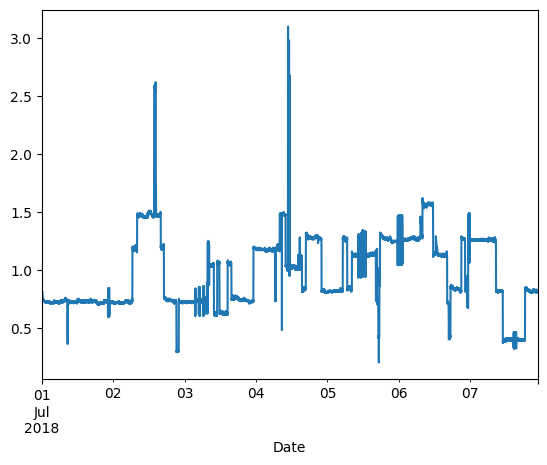

In [ ]:
df_data[feature_selected].plot()

In [ ]:
# firstly we check the data with adfuler test
from statsmodels.tsa import stattools
adf_result = stattools.adfuller(df_data[feature_selected], autolag='AIC')
print(f'The number of lags used: {adf_result[2]}')
print(f'The number of observations used: {adf_result[3]}')
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f' {key}, {round(value,4)}')

The number of lags used: 38
The number of observations used: 9961
Critial Values:
 1%, -3.431
Critial Values:
 5%, -2.8618
Critial Values:
 10%, -2.5669


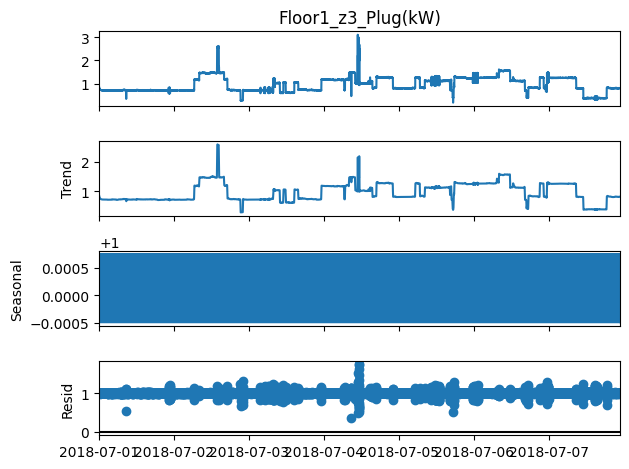

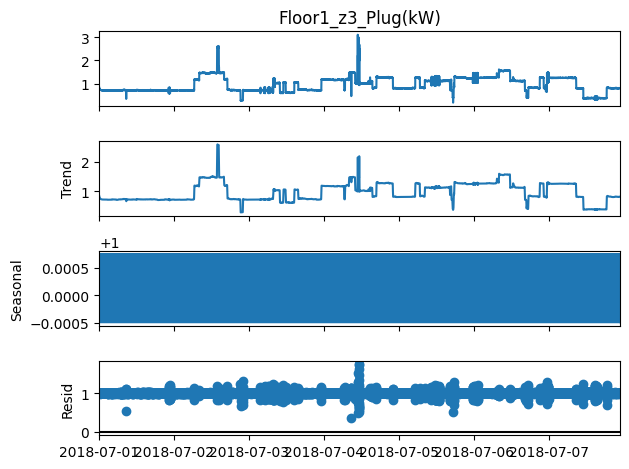

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(df_data[feature_selected],  period=6,
                            model ='multiplicative')

# ETS plot
result.plot()

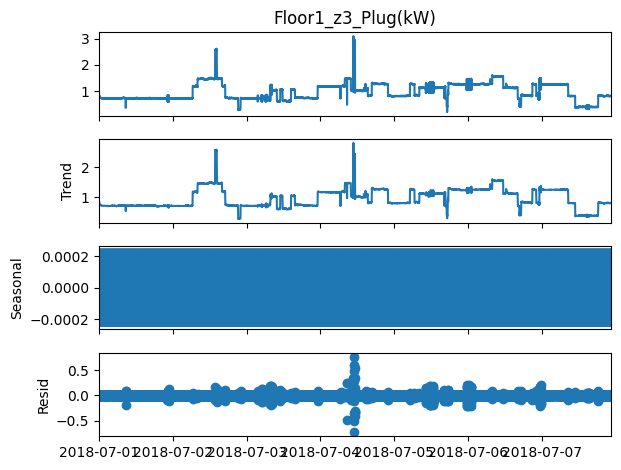

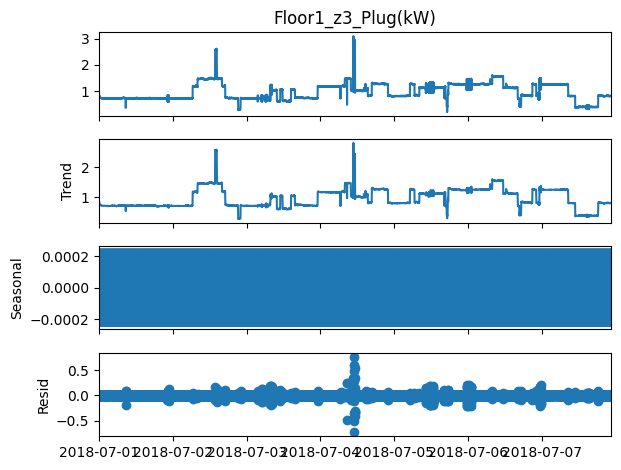

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(df_data[feature_selected], period=2,
                            model ='additive')

# ETS plot
result.plot()

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.0 MB/s eta 0:00:00


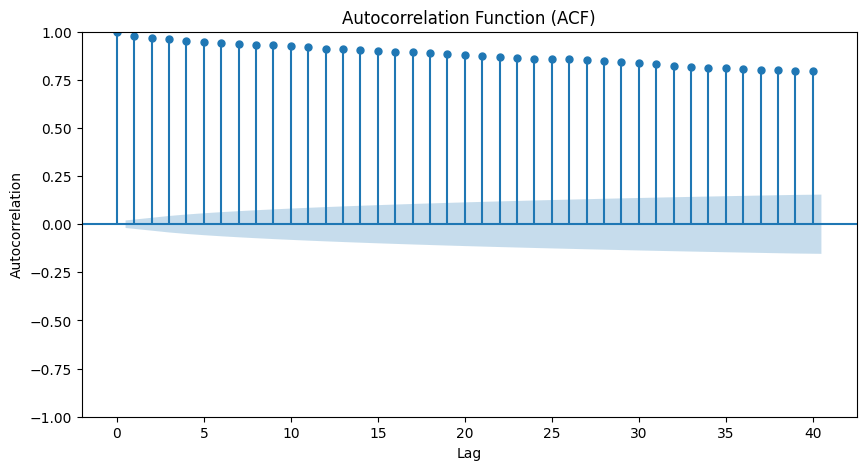

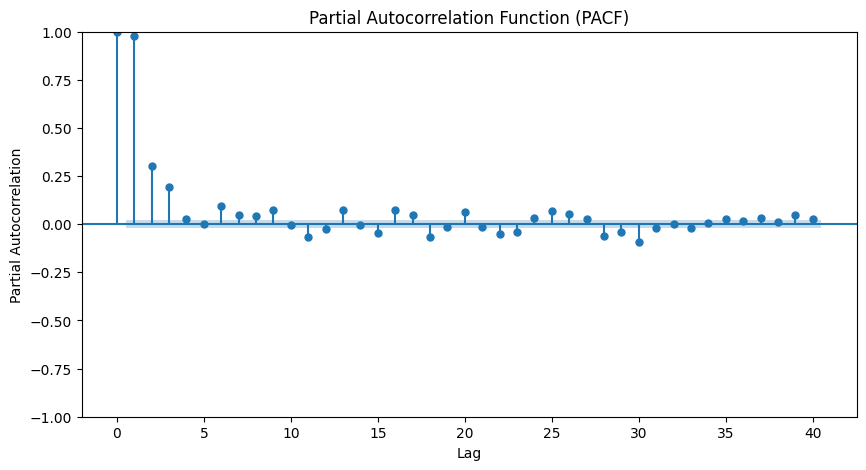

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_data[feature_selected], ax=ax)
plt.xlabel('Lag')
plt.ylabel('value')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_data[feature_selected], ax=ax)
plt.xlabel('value')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
df_copy = df_data[0:2000]

In [ ]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function
stepwise_fit = auto_arima(df_copy[feature_selected], start_p = 1, start_q = 1,
                          max_p = 5, max_q = 5, m = 5,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=11.13 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-7974.859, Time=0.34 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-9015.133, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=4.36 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-8382.510, Time=0.47 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-9191.210, Time=2.38 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=5.20 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=2.77 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-8662.047, Time=0.77 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-9206.057, Time=3.74 sec
 ARIMA(2,1,0)(1,1,0)[5]             : AIC=-9030.713, Time=2.26 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=7.60 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=inf, Time=6.19 sec
 ARIMA(3,1,0)(2,1,0)[5]             : AIC=-9206.688, Time=2.96 sec
 ARIMA(3,1,0)(1,1,0)[5]             : AIC=-9034.351, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2000
Model:             SARIMAX(4, 1, 0)x(2, 1, [1], 5)   Log Likelihood                4887.740
Date:                             Sat, 27 Jan 2024   AIC                          -9759.479
Time:                                     21:36:53   BIC                          -9714.696
Sample:                                 07-01-2018   HQIC                         -9743.033
                                      - 07-02-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5242      0.003   -156.045      0.000      -0.531      -0.518
ar.L2         -0.1415      0.006    -22.603      0.000      -0.154      -0.129
ar.L3         -0.0174      0.014     -1.283      0.199      -0.044       0.009
ar.L4          0.0746      0.018      4.252      0.000       0.040       0.109
ar.S.L5       -0.0317      0.022     -1.441      0.150      -0.075       0.011
ar.S.L10       0.0192      0.014      1.423      0.155      -0.007       0.046
ma.S.L5       -0.9450      0.010    -90.464      0.000      -0.965      -0.925
sigma2         0.0004   1.82e-06    241.044      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1426583.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.64   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                       133.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm

<Axes: xlabel='Date'>

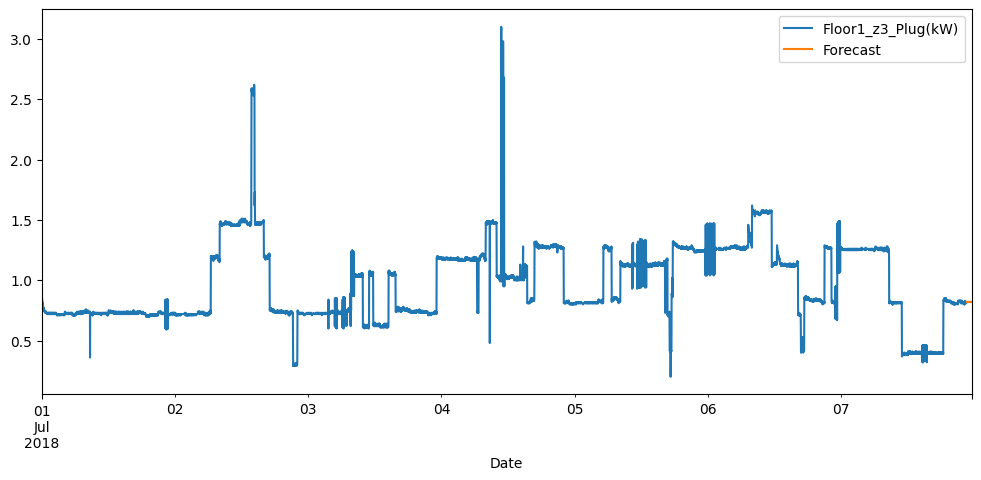

In [ ]:

# Train the model on part of the dataset
model = sm.tsa.statespace.SARIMAX(df_data[feature_selected],
                        order = (4,1,0),
                        seasonal_order =(2,1,1, 5))
result = model.fit()

# Forecast for the next 3 month
forecast = result.predict(start = len(df_data)-3,
                          end = len((df_data-3))+ 50,
                          typ = 'levels').rename('Forecast')

forecast = forecast.map(lambda x: float(x))

# Plot the forecast values
df_data[feature_selected].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


In [ ]:
df_data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.0,65.16,29.40,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.0,65.17,29.30,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.0,65.18,29.30,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.0,65.18,29.30,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.0,65.18,29.40,0.0,0.0,0.0,0.13,66.70,28.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 22:35:00,13.07,18.50,45.69,0.03,0.01,0.00,16.29,16.68,27.19,0.82,...,0.0,61.78,28.86,0.0,0.0,0.0,0.03,63.72,28.71,0.0
2018-07-07 22:36:00,13.05,18.47,45.62,0.03,0.01,0.00,16.27,16.64,26.07,0.82,...,0.0,61.80,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0
2018-07-07 22:37:00,13.04,18.47,45.70,0.03,0.01,0.00,16.26,16.28,18.81,0.82,...,0.0,61.81,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0


<Axes: xlabel='Date'>

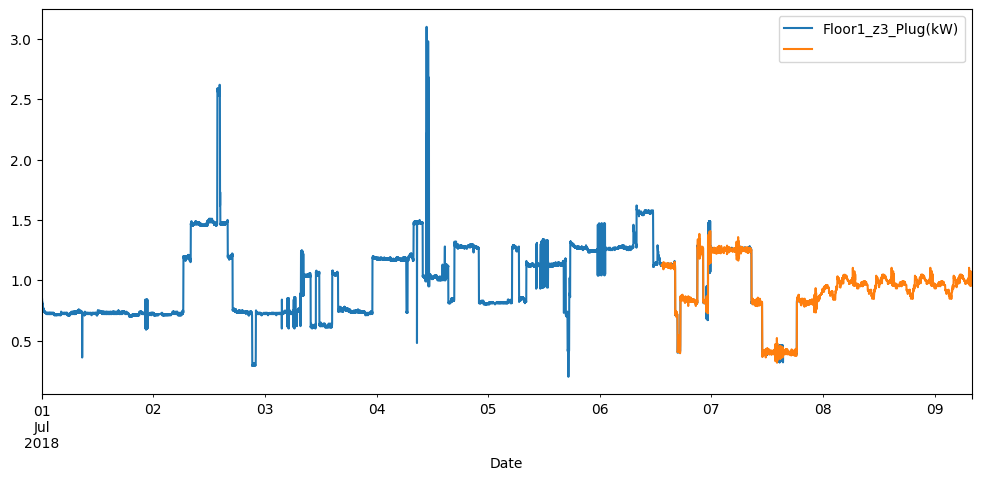

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset

# fit model
model = AutoReg(df_data[feature_selected], lags=2, trend='c', seasonal=True, period=500)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df_data[feature_selected])-2000, len(df_data[feature_selected])+2000)
df_data[feature_selected].plot(figsize = (12, 5), legend = True)
yhat.plot(legend = True)

<Axes: xlabel='Date'>

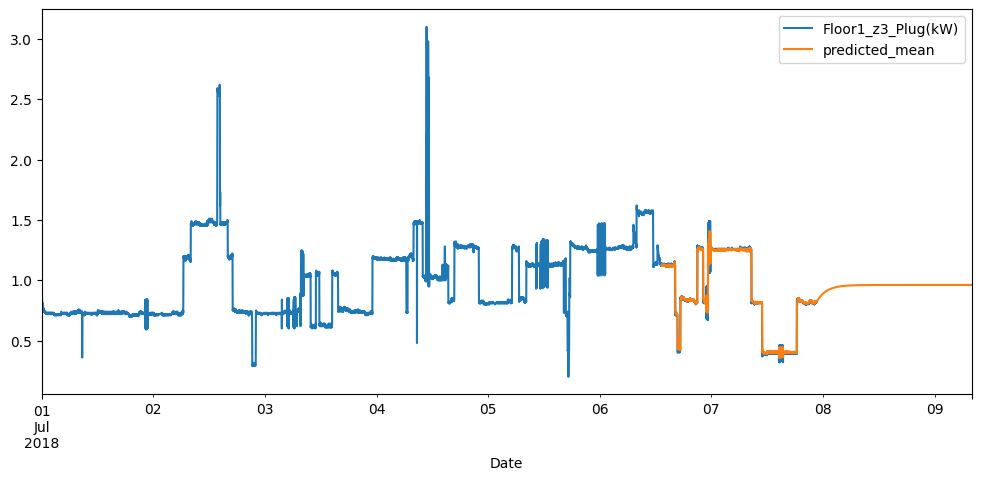

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
# fit model
model = ARIMA(df_data[feature_selected], order=(2, 0, 4))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df_data[feature_selected])-2000, len(df_data[feature_selected])+2000)
df_data[feature_selected].plot(figsize = (12, 5), legend = True)
yhat.plot(legend = True)

In [ ]:
# Prepare data for modeling
df_temp = series.reset_index().copy()
df_temp = df_temp.dropna()

# Add timestamp features
df_temp['weekday'] = df_temp['Date'].dt.weekday
df_temp['hour'] = df_temp['Date'].dt.hour
df_temp['date'] =pd.to_datetime(df_temp['Date'].dt.date)

df_temp = df_temp.set_index('Date').drop(['date'],axis=1)

df_temp = df_temp.rename(columns={0:'total_demand_meas'})

df_temp

<Axes: xlabel='weekday,hour'>

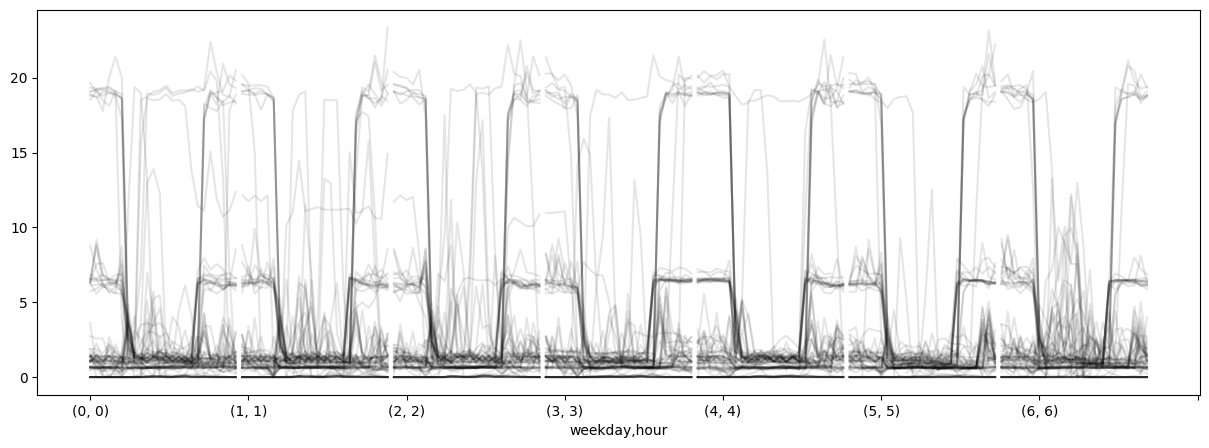

In [ ]:
# Weekly profiles of building energy
df_plot = df_temp.copy()
df_plot['date'] = pd.to_datetime(df_plot.index.date)
df_plot.pivot_table(columns=['weekday','hour'], index='date', values='total_demand_meas').T.plot(figsize=(15,5),color='black',alpha=0.1,legend=False)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import time

import datetime as datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



import requests

import lightgbm as lgb

In [ ]:
pip install cufflinks --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [ ]:
import cufflinks as cf
cf.set_config_file(offline=True)